In [1]:
import corner
import numpy as np
import os
import pandas as pd

In [2]:
basepath = 'for_francois'
opsims = ['baseline_v1.4_10yrs', 'twilight_neo_mod1_v1.4_10yrs', 'var_expt_v1.4_10yrs', 'weather_1.2_v1.4_10yrs']
phot_fn = 'test.cat'
z_fn = 'zphot.cat'

In [3]:
names_phot = ('ID', 'z_true', 
        'u', 'g', 'r', 'i', 'z', 'y', 
        'err_u', 'err_g', 'err_r', 'err_i', 'err_z', 'err_y', 
        'u-g', 'g-r', 'r-i', 'i-z', 'z-y',
        'err_u-g', 'err_g-r', 'err_r-i', 'err_i-z', 'err_z-y')

names_z = ('ID', 'z_true', 'z_phot', 'dz_phot', 'NN', 'N_train')

In [11]:
colors = 'krgb'

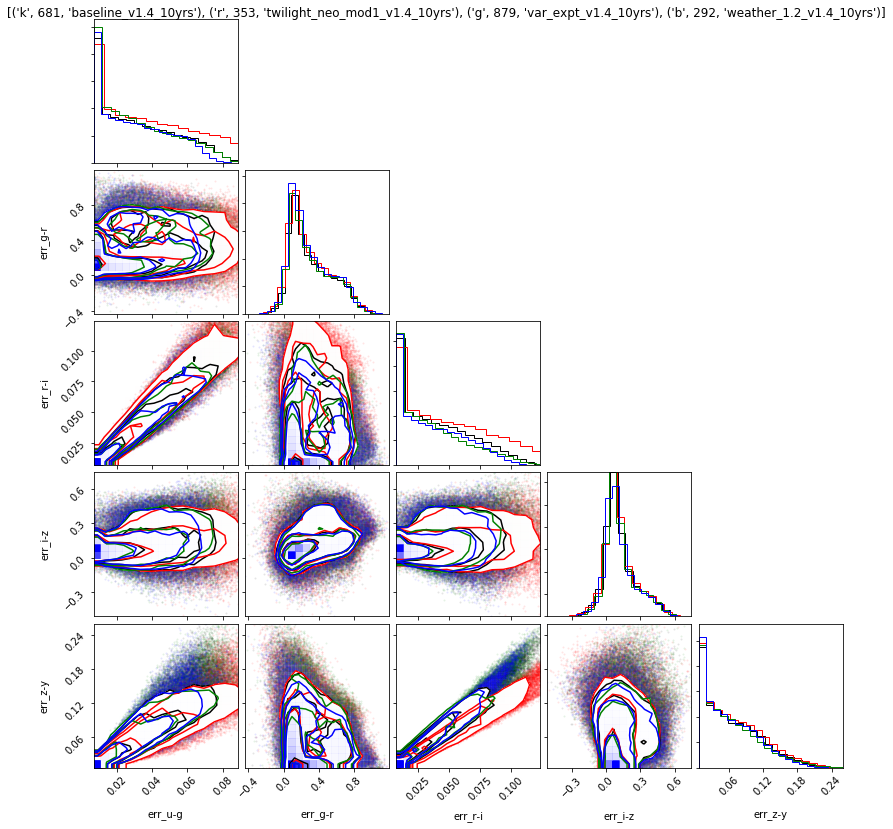

In [17]:
# allphot = {}
alltext = []
whichcol = ['err_u-g', 'err_g-r', 'err_r-i', 'err_i-z', 'err_z-y']#['u', 'g', 'r', 'i', 'z', 'y']
for i, opsim in enumerate(opsims):
    phot_np = np.loadtxt(os.path.join(os.path.join(basepath, opsim), phot_fn))
    phot_pd = pd.DataFrame(phot_np, columns=names_phot).set_index('ID')#.dropna()
    alltext.append((colors[i], max(phot_pd[whichcol].isna().sum()), opsim))
    phot_pd = phot_pd.dropna()
    if i == 0:
        fig = corner.corner(phot_pd[whichcol], label=opsim)
    else:
        corner.corner(phot_pd[whichcol], fig=fig, color=colors[i], label=opsim)
# fig.legend(loc='upper right')
fig.suptitle(str(alltext))
#     allphot[opsim] = phot_pd
fig.savefig('errdists.png')

## scratch

In [ ]:
# phot_np

In [ ]:
phot_pd = pd.DataFrame(phot_np, columns=names_phot).set_index('ID').dropna()

In [ ]:
# phot_pd

In [ ]:
z_np = np.loadtxt('for_francois/baseline_v1.4_10yrs/zphot.cat')
z_pd = pd.DataFrame(z_np, columns=names_z).set_index('ID')

In [ ]:
# z_pd

In [ ]:
max(z_pd['z_true'])